In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('goodreads_data.csv')

In [3]:
df

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...


In [4]:
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [5]:
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0                                               Book  \
0           0                              To Kill a Mockingbird   
1           1  Harry Potter and the Philosopher’s Stone (Harr...   
2           2                                Pride and Prejudice   
3           3                          The Diary of a Young Girl   
4           4                                        Animal Farm   

          Author                                        Description  \
0     Harper Lee  The unforgettable novel of a childhood in a sl...   
1   J.K. Rowling  Harry Potter thinks he is an ordinary boy - un...   
2    Jane Austen  Since its immediate success in 1813, Pride and...   
3     Anne Frank  Discovered in the attic in which she spent the...   
4  George Orwell  Librarian's note: There is an Alternate Cover ...   

                                              Genres  Avg_Rating Num_Ratings  \
0  ['Classics', 'Fiction', 'Historical Fiction', ...        4.27   5,691,311   
1  [

In [6]:
print(df.isnull().sum())

Unnamed: 0      0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64


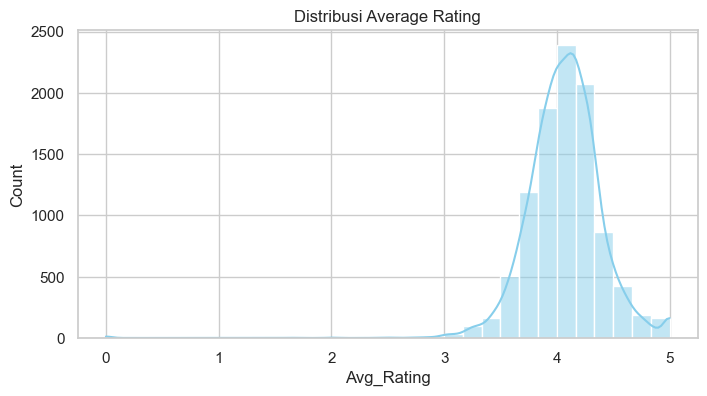

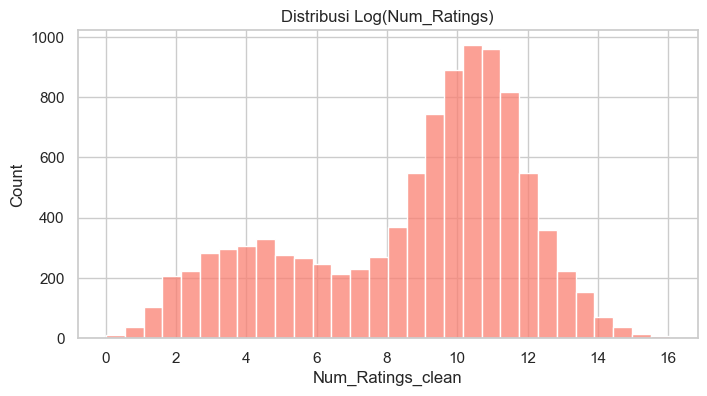

In [7]:
df['Num_Ratings_clean'] = df['Num_Ratings'].str.replace(',', '').astype(int)

plt.figure(figsize=(8,4))
sns.histplot(df['Avg_Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Average Rating')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['Num_Ratings_clean']), bins=30, color='salmon')
plt.title('Distribusi Log(Num_Ratings)')
plt.show()

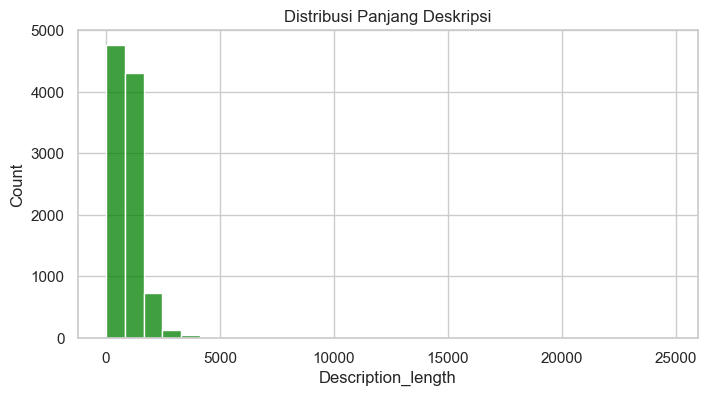

In [8]:
df['Description_length'] = df['Description'].astype(str).apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df['Description_length'], bins=30, color='green')
plt.title('Distribusi Panjang Deskripsi')
plt.show()

C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_13804\3301877824.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')


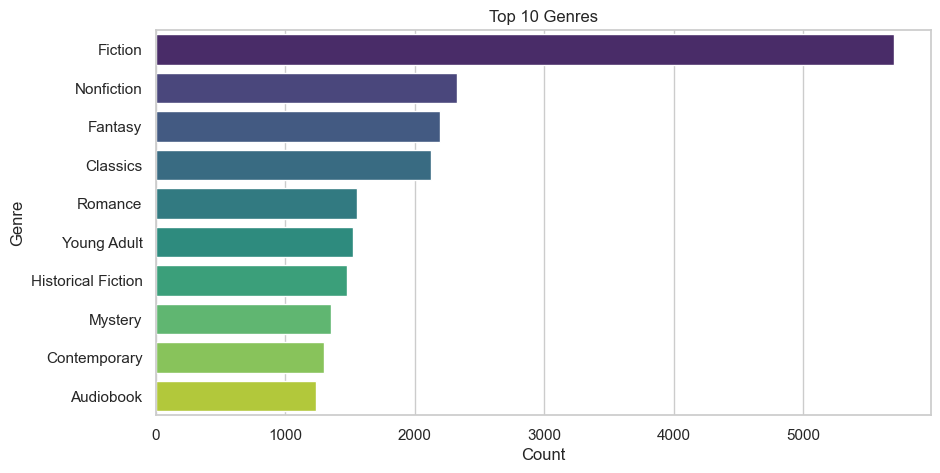

In [9]:
from ast import literal_eval

df['Genres_list'] = df['Genres'].apply(lambda x: literal_eval(x) if pd.notnull(x) and x != '[]' else [])

all_genres = [genre for sublist in df['Genres_list'] for genre in sublist]

from collections import Counter
genre_counts = Counter(all_genres)

top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title('Top 10 Genres')
plt.show()

In [11]:
df = df.drop(columns=['Unnamed: 0'])

In [13]:
df['Description'] = df['Description'].fillna('')
df['Genres_list'] = df['Genres_list'].apply(lambda x: x if len(x) > 0 else ['Unknown'])

In [15]:
df['Num_Ratings_clean'] = df['Num_Ratings'].str.replace(',', '').astype(int)

df['Genres_list'] = df['Genres'].apply(lambda x: literal_eval(x) if pd.notnull(x) and x != '[]' else [])

df['Description'] = df['Description'].fillna('')
df['Genres_list'] = df['Genres_list'].apply(lambda x: x if len(x) > 0 else ['Unknown'])

In [19]:
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

print("\nDescriptive stats Avg_Rating:")
print(df['Avg_Rating'].describe())

print("\nDescriptive stats Num_Ratings_clean:")
print(df['Num_Ratings_clean'].describe())

df['Description_length'] = df['Description'].astype(str).apply(len)
print("\nDescriptive stats panjang deskripsi:")
print(df['Description_length'].describe())

all_genres = [genre for sublist in df['Genres_list'] for genre in sublist]
genre_counts = Counter(all_genres)
top_10 = genre_counts.most_common(10)

print("\nTop 10 Genres:")
for genre, count in top_10:
    print(f"{genre}: {count}")

corr = np.corrcoef(df['Avg_Rating'], np.log1p(df['Num_Ratings_clean']))[0,1]
print(f"\nKorelasi Avg_Rating vs Log(Num_Ratings): {corr:.4f}")


Jumlah missing values per kolom:
Book                  0
Author                0
Description           0
Genres                0
Avg_Rating            0
Num_Ratings           0
URL                   0
Num_Ratings_clean     0
Description_length    0
Genres_list           0
dtype: int64

Descriptive stats Avg_Rating:
count    10000.000000
mean         4.068577
std          0.335359
min          0.000000
25%          3.880000
50%          4.080000
75%          4.260000
max          5.000000
Name: Avg_Rating, dtype: float64

Descriptive stats Num_Ratings_clean:
count    1.000000e+04
mean     9.305497e+04
std      3.421488e+05
min      0.000000e+00
25%      5.180000e+02
50%      1.584350e+04
75%      6.475100e+04
max      9.278135e+06
Name: Num_Ratings_clean, dtype: float64

Descriptive stats panjang deskripsi:
count    10000.000000
mean       948.774600
std        623.812499
min          0.000000
25%        578.000000
50%        852.000000
75%       1180.250000
max      24732.000000
Name:

In [20]:
df

,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Num_Ratings_clean,Description_length,Genres_list
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...,5691311,818,"[Classics, Fiction, Historical Fiction, School..."
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...,9278135,227,"[Fantasy, Fiction, Young Adult, Magic, Childre..."
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...,3944155,648,"[Classics, Fiction, Romance, Historical Fictio..."
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...,3488438,1041,"[Classics, Nonfiction, History, Biography, Mem..."
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...,3575172,780,"[Classics, Fiction, Dystopia, Fantasy, Politic..."
...,...,...,...,...,...,...,...,...,...,...
9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...,276,866,"[Dystopia, Science Fiction, Post Apocalyptic, ..."
9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...,60,1051,[Unknown]
9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...,383,875,"[Fiction, Horror, Dystopia, Coming Of Age]"
9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...,263,1188,"[New Adult, Romance, Contemporary Romance, Con..."


In [21]:
# Tampilkan info awal
print("\nInfo dataset:")
print(df.info())

# Cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

# Tangani missing value deskripsi: isi string kosong
df['Description'] = df['Description'].fillna('')

# Bersihkan Num_Ratings: ubah dari string '5,691,311' → int
df['Num_Ratings_clean'] = df['Num_Ratings'].str.replace(',', '').astype(int)

# Ubah Genres (string list) ke Python list
df['Genres_list'] = df['Genres'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) and x != '[]' else ['Unknown']
)

# Buat feature baru
df['Description_length'] = df['Description'].apply(len)
df['Title_length'] = df['Book'].apply(len)
df['Num_Genres'] = df['Genres_list'].apply(len)
df['Main_Genre'] = df['Genres_list'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')

# Tampilkan sample data
print("\nSample data setelah preparation:")
print(df[['Book', 'Author', 'Avg_Rating', 'Num_Ratings_clean', 'Description_length', 
          'Num_Genres', 'Main_Genre']].head())

# Simpan dataset hasil cleaning untuk tahap selanjutnya
df.to_csv('books_cleaned_stage1.csv', index=False)

print("\nData sudah dibersihkan dan fitur awal dibuat. File disimpan sebagai 'books_cleaned_stage1.csv'")



Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Book                10000 non-null  object 
 1   Author              10000 non-null  object 
 2   Description         10000 non-null  object 
 3   Genres              10000 non-null  object 
 4   Avg_Rating          10000 non-null  float64
 5   Num_Ratings         10000 non-null  object 
 6   URL                 10000 non-null  object 
 7   Num_Ratings_clean   10000 non-null  int32  
 8   Description_length  10000 non-null  int64  
 9   Genres_list         10000 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 742.3+ KB
None

Jumlah missing values per kolom:
Book                  0
Author                0
Description           0
Genres                0
Avg_Rating            0
Num_Ratings           0
URL                   0
Num_Rati

In [22]:
df_clean = df[df['Avg_Rating'] > 0].copy()
df_clean = df_clean[df_clean['Num_Ratings_clean'] > 0]
df_clean = df_clean[df_clean['Description_length'] > 20]

print(f"Sisa data setelah cleaning noise: {len(df_clean)} buku")

Sisa data setelah cleaning noise: 9893 buku


In [23]:
print("\nDistribusi Avg_Rating:")
print(df_clean['Avg_Rating'].describe())

print("\nDistribusi Num_Ratings_clean:")
print(df_clean['Num_Ratings_clean'].describe())

df_clean['Log_Num_Ratings'] = np.log1p(df_clean['Num_Ratings_clean'])
print("\nDistribusi Log_Num_Ratings:")
print(df_clean['Log_Num_Ratings'].describe())


Distribusi Avg_Rating:
count    9893.000000
mean        4.070586
std         0.311088
min         1.640000
25%         3.880000
50%         4.070000
75%         4.260000
max         5.000000
Name: Avg_Rating, dtype: float64

Distribusi Num_Ratings_clean:
count    9.893000e+03
mean     9.404790e+04
std      3.438602e+05
min      1.000000e+00
25%      5.790000e+02
50%      1.630400e+04
75%      6.537700e+04
max      9.278135e+06
Name: Num_Ratings_clean, dtype: float64

Distribusi Log_Num_Ratings:
count    9893.000000
mean        8.740727
std         3.226315
min         0.693147
25%         6.363028
50%         9.699227
75%        11.087941
max        16.043171
Name: Log_Num_Ratings, dtype: float64


In [24]:
q1 = df_clean['Avg_Rating'].quantile(0.25)
q3 = df_clean['Avg_Rating'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers_rating = df_clean[(df_clean['Avg_Rating'] < lower) | (df_clean['Avg_Rating'] > upper)]
print(f"\nJumlah outlier di Avg_Rating: {len(outliers_rating)}")

q1_log = df_clean['Log_Num_Ratings'].quantile(0.25)
q3_log = df_clean['Log_Num_Ratings'].quantile(0.75)
iqr_log = q3_log - q1_log
lower_log = q1_log - 1.5 * iqr_log
upper_log = q3_log + 1.5 * iqr_log

outliers_num = df_clean[(df_clean['Log_Num_Ratings'] < lower_log) | (df_clean['Log_Num_Ratings'] > upper_log)]
print(f"Jumlah outlier di Num_Ratings_clean (log scale): {len(outliers_num)}")


Jumlah outlier di Avg_Rating: 274
Jumlah outlier di Num_Ratings_clean (log scale): 0


In [25]:
from collections import Counter

In [30]:
genre_counts = df_clean['Main_Genre'].value_counts()

print("\nTop 10 Main_Genre paling banyak:")
print(genre_counts.head(10))

max_count = genre_counts.max()
min_count = genre_counts.min()
print(f"\nRasio genre paling banyak vs paling sedikit: {max_count} : {min_count}")


Top 10 Main_Genre paling banyak:
Main_Genre
Fiction               1703
Nonfiction             952
Fantasy                939
Unknown                908
Classics               515
Historical Fiction     466
Mystery                387
Young Adult            386
Science Fiction        324
Romance                296
Name: count, dtype: int64

Rasio genre paling banyak vs paling sedikit: 1703 : 1


In [31]:
genre_counts = df_clean['Main_Genre'].value_counts()

max_count = genre_counts.max()
genre_weights = (max_count / genre_counts).to_dict()

print("\nContoh genre_weights:")
for genre, weight in list(genre_weights.items())[:10]:
    print(f"{genre}: {weight:.2f}")

df_clean['Genre_Weight'] = df_clean['Main_Genre'].apply(lambda x: genre_weights.get(x, 1.0))


Contoh genre_weights:
Fiction: 1.00
Nonfiction: 1.79
Fantasy: 1.81
Unknown: 1.88
Classics: 3.31
Historical Fiction: 3.65
Mystery: 4.40
Young Adult: 4.41
Science Fiction: 5.26
Romance: 5.75


In [33]:
def fill_unknown_genre(row):
    if row['Main_Genre'] != 'Unknown':
        return row['Main_Genre']
    
    desc = row['Description'].lower()
    if 'magic' in desc or 'wizard' in desc:
        return 'Fantasy'
    elif 'love' in desc or 'romance' in desc:
        return 'Romance'
    elif 'war' in desc or 'history' in desc:
        return 'Historical Fiction'
    elif 'detective' in desc or 'mystery' in desc:
        return 'Mystery'
    elif 'science' in desc or 'space' in desc:
        return 'Science Fiction'
    else:
        return 'Unknown'

df_clean['Main_Genre_Filled'] = df_clean.apply(fill_unknown_genre, axis=1)

unknown_before = (df_clean['Main_Genre'] == 'Unknown').sum()
unknown_after = (df_clean['Main_Genre_Filled'] == 'Unknown').sum()

print(f"\nJumlah buku dengan genre Unknown sebelum: {unknown_before}")
print(f"Jumlah buku dengan genre Unknown sesudah: {unknown_after}")


Jumlah buku dengan genre Unknown sebelum: 908
Jumlah buku dengan genre Unknown sesudah: 370


In [34]:
df_clean['Log_Num_Ratings'] = np.log1p(df_clean['Num_Ratings_clean'])

df_clean['Diversity_Score'] = df_clean.apply(
    lambda row: row['Genre_Weight'] * row['Log_Num_Ratings'], axis=1
)

print("\nContoh skor diversity-aware:")
print(df_clean[['Book', 'Main_Genre_Filled', 'Genre_Weight', 'Log_Num_Ratings', 'Diversity_Score']].head())


Contoh skor diversity-aware:
                                                Book Main_Genre_Filled  \
0                              To Kill a Mockingbird          Classics   
1  Harry Potter and the Philosopher’s Stone (Harr...           Fantasy   
2                                Pride and Prejudice          Classics   
3                          The Diary of a Young Girl          Classics   
4                                        Animal Farm          Classics   

   Genre_Weight  Log_Num_Ratings  Diversity_Score  
0      3.306796        15.554451        51.435399  
1      1.813632        16.043171        29.096401  
2      3.306796        15.187746        50.222778  
3      3.306796        15.064965        49.816767  
4      3.306796        15.089524        49.897980  


In [35]:
genre_stats = df_clean.groupby('Main_Genre_Filled').agg(
    Avg_Rating_Mean=('Avg_Rating', 'mean'),
    Num_Ratings_Mean=('Num_Ratings_clean', 'mean'),
    Count=('Book', 'count')
).sort_values(by='Count', ascending=False)

print("\nDistribusi rating & Num_Ratings per genre:")
print(genre_stats.head(10))

max_count = genre_stats['Count'].max()
min_count = genre_stats['Count'].min()
print(f"\nRasio genre paling banyak vs paling sedikit (setelah filling): {max_count}:{min_count}")


Distribusi rating & Num_Ratings per genre:
                    Avg_Rating_Mean  Num_Ratings_Mean  Count
Main_Genre_Filled                                           
Fiction                    3.938614     103076.285379   1703
Fantasy                    4.156663     172224.387289   1007
Nonfiction                 4.066975      72828.117647    952
Historical Fiction         4.153462      69938.477564    624
Romance                    4.171623      64099.526770    579
Classics                   3.975670     251865.953398    515
Mystery                    3.992494      72933.872818    401
Young Adult                3.971632     310544.106218    386
Unknown                    4.342405         41.908108    370
Science Fiction            4.016460      87030.174041    339

Rasio genre paling banyak vs paling sedikit (setelah filling): 1703:1


In [36]:
df_clean

,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Num_Ratings_clean,Description_length,Genres_list,Title_length,Num_Genres,Main_Genre,Log_Num_Ratings,Genre_Weight,Main_Genre_Filled,Diversity_Score
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...,5691311,818,"[Classics, Fiction, Historical Fiction, School...",21,7,Classics,15.554451,3.306796,Classics,51.435399
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...,9278135,227,"[Fantasy, Fiction, Young Adult, Magic, Childre...",59,7,Fantasy,16.043171,1.813632,Fantasy,29.096401
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...,3944155,648,"[Classics, Fiction, Romance, Historical Fictio...",19,7,Classics,15.187746,3.306796,Classics,50.222778
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...,3488438,1041,"[Classics, Nonfiction, History, Biography, Mem...",25,7,Classics,15.064965,3.306796,Classics,49.816767
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...,3575172,780,"[Classics, Fiction, Dystopia, Fantasy, Politic...",11,7,Classics,15.089524,3.306796,Classics,49.897980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...,276,866,"[Dystopia, Science Fiction, Post Apocalyptic, ...",31,5,Dystopia,5.624018,70.958333,Dystopia,399.070909
9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...,60,1051,[Unknown],6,1,Unknown,4.110874,1.875551,Unknown,7.710152
9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...,383,875,"[Fiction, Horror, Dystopia, Coming Of Age]",21,4,Fiction,5.950643,1.000000,Fiction,5.950643
9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...,263,1188,"[New Adult, Romance, Contemporary Romance, Con...",30,4,New Adult,5.575949,94.611111,New Adult,527.546740


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
tfidf_desc = TfidfVectorizer(max_features=5000, stop_words='english')
desc_matrix = tfidf_desc.fit_transform(df_clean['Description'])

tfidf_title = TfidfVectorizer(max_features=1000, stop_words='english')
title_matrix = tfidf_title.fit_transform(df_clean['Book'])

print(f"Description matrix shape: {desc_matrix.shape}")
print(f"Title matrix shape: {title_matrix.shape}")

Description matrix shape: (9893, 5000)
Title matrix shape: (9893, 1000)


In [40]:
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df_clean['Genres_list'])

print(f"Genre matrix shape: {genre_matrix.shape}")

Genre matrix shape: (9893, 618)


In [41]:
num_features = df_clean[['Avg_Rating', 'Log_Num_Ratings', 'Diversity_Score']].values

scaler = MinMaxScaler()
num_features_scaled = scaler.fit_transform(num_features)

print(f"Numerik features shape: {num_features_scaled.shape}")

Numerik features shape: (9893, 3)


In [42]:
final_matrix = hstack([desc_matrix, title_matrix, genre_matrix, num_features_scaled])

print(f"Final feature matrix shape: {final_matrix.shape}")

Final feature matrix shape: (9893, 6621)


In [43]:
similarity_matrix = cosine_similarity(final_matrix, final_matrix)

print(f"Similarity matrix shape: {similarity_matrix.shape}")

Similarity matrix shape: (9893, 9893)


In [45]:
import numpy as np

def recommend_books(title, top_n=10):
    matches = df_clean[df_clean['Book'].str.lower() == title.lower()]
    if matches.empty:
        print(f"Buku dengan judul '{title}' tidak ditemukan.")
        return None
    
    book_idx = matches.index[0]
    
    # Ambil similarity scores ke semua buku lain
    similarities = similarity_matrix[book_idx]
    
    # Ambil Diversity_Score semua buku
    diversity_scores = df_clean['Diversity_Score'].values
    
    # Hitung skor akhir: similarity × diversity
    final_scores = similarities * diversity_scores
    
    # Urutkan skor tertinggi (kecuali dirinya sendiri)
    top_n_idx = np.argsort(final_scores)[::-1]
    top_n_idx = top_n_idx[top_n_idx != book_idx][:top_n]
    
    # Ambil data buku
    recommended_books = df_clean.iloc[top_n_idx].copy()
    
    # Tambahkan kolom skor ke hasil
    recommended_books['Final_Score'] = final_scores[top_n_idx]
    
    # Tampilkan hasil ringkas
    print(f"\n📚 Rekomendasi mirip '{title}' (top {top_n}):\n")
    print(recommended_books[['Book', 'Author', 'Main_Genre_Filled', 'Avg_Rating', 'Final_Score']])
    
    # Distribusi genre & diversity di hasil
    print("\nDistribusi genre di top-N rekomendasi:")
    print(recommended_books['Main_Genre_Filled'].value_counts())
    
    print("\nStatistik Diversity_Score di top-N rekomendasi:")
    print(recommended_books['Diversity_Score'].describe())
    
    return recommended_books

In [46]:
recommend_books("To Kill a Mockingbird", top_n=10)


📚 Rekomendasi mirip 'To Kill a Mockingbird' (top 10):

                                                   Book  \
5700  Tennis Shoes Among the Nephites (Tennis Shoes,...   
9353                              The Town That Drowned   
4739                                          मृत्युंजय   
6389                                        The Swimmer   
8552                                       Лісова пісня   
7751        బారిష్టర్ పార్వతీశం [Barrister Parvateesam]   
5446                                   Le Petit Nicolas   
5691                        Leo Tolstoy's War and Peace   
2180                                  Stone Butch Blues   
611                                    Walks Away Woman   

                          Author     Main_Genre_Filled  Avg_Rating  \
5700          Chris Heimerdinger                   Lds        4.00   
9353                  Riel Nason                Canada        3.81   
4739              Shivaji Sawant               Marathi        4.51   
6389          

,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Num_Ratings_clean,Description_length,Genres_list,Title_length,Num_Genres,Main_Genre,Log_Num_Ratings,Genre_Weight,Main_Genre_Filled,Diversity_Score,Final_Score
5700,"Tennis Shoes Among the Nephites (Tennis Shoes,...",Chris Heimerdinger,"Jim Hawkins has a bad attitude. What's more, h...","['Lds', 'Lds Fiction', 'Fantasy', 'Young Adult...",4.00,"16,721",https://www.goodreads.com/book/show/121809.Ten...,16721,750,"[Lds, Lds Fiction, Fantasy, Young Adult, Ficti...",50,7,Lds,9.724480,1703.0,Lds,16560.790286,6835.091991
9353,The Town That Drowned,Riel Nason,Living with a weird brother in a small town ca...,"['Canada', 'Young Adult', 'Historical Fiction'...",3.81,764,https://www.goodreads.com/book/show/11326691-t...,764,1214,"[Canada, Young Adult, Historical Fiction, Fict...",21,7,Canada,6.639876,1703.0,Canada,11307.708545,5461.845429
4739,मृत्युंजय,Shivaji Sawant,The search for the meaning of Being is man's e...,"['Marathi', 'Mythology', 'Fiction', 'Indian Li...",4.51,"10,390",https://www.goodreads.com/book/show/6369447,10390,1471,"[Marathi, Mythology, Fiction, Indian Literatur...",9,7,Marathi,9.248695,1703.0,Marathi,15750.528140,5070.226300
6389,The Swimmer,Zsuzsa Bánk,"Hungary, 1956. Without a word, Katalin leaves ...","['German Literature', 'Fiction', 'Literature',...",3.88,799,https://www.goodreads.com/book/show/652074.The...,799,863,"[German Literature, Fiction, Literature, Hunga...",11,7,German Literature,6.684612,1703.0,German Literature,11383.893772,4592.069186
8552,Лісова пісня,Lesia Ukrainka,"""Лісова пісня"" — драма-феєрія в трьох діях Лес...","['Ukrainian Literature', 'Classics', 'Poetry',...",4.42,"2,018",https://www.goodreads.com/book/show/24843760,2018,165,"[Ukrainian Literature, Classics, Poetry, Fanta...",12,7,Ukrainian Literature,7.610358,1703.0,Ukrainian Literature,12960.439024,4262.685886
7751,బారిష్టర్ పార్వతీశం [Barrister Parvateesam],Mokkapati Narasimha Sastry,First novel Describes the naive Parvateesam ru...,"['Comedy', 'Fiction', 'Humor', 'Classics', 'Co...",4.27,"2,625",https://www.goodreads.com/book/show/12411292-b...,2625,1001,"[Comedy, Fiction, Humor, Classics, Comics, Ind...",43,7,Comedy,7.873217,1703.0,Comedy,13408.088644,4198.243779
5446,Le Petit Nicolas,René Goscinny,"La maîtresse est inquiète, le photographe s'ép...","['France', 'Fiction', 'Childrens', 'Classics',...",4.14,"38,380",https://www.goodreads.com/book/show/74256.Le_P...,38380,408,"[France, Fiction, Childrens, Classics, Humor, ...",16,7,France,10.555318,851.5,France,8987.853128,3646.484445
5691,Leo Tolstoy's War and Peace,Harold Bloom,A collection of seven critical essays discussi...,"['Literary Criticism', 'Literature', 'Historic...",3.96,137,https://www.goodreads.com/book/show/50290.Leo_...,137,128,"[Literary Criticism, Literature, Historical Fi...",27,5,Literary Criticism,4.927254,1703.0,Literary Criticism,8391.113026,3595.607572
2180,Stone Butch Blues,Leslie Feinberg,Woman or man? This internationally acclaimed n...,"['Queer', 'Fiction', 'LGBT', 'Feminism', 'Gend...",4.45,"24,824",https://www.goodreads.com/book/show/139569.Sto...,24824,670,"[Queer, Fiction, LGBT, Feminism, Gender, Class...",17,7,Queer,10.119606,851.5,Queer,8616.844925,3557.879362
611,Walks Away Woman,Ki Longfellow,"Ki Longfellow, acclaimed author of Flow Down L...","['Survival', 'Adventure', 'Fiction', 'Novels',...",4.37,"1,143",https://www.goodreads.com/book/show/19405702-w...,1143,1802,"[Survival, Adventure, Fiction, Novels, Thrille...",16,7,Survival,7.042286,1703.0,Survival,11993.013351,3523.047350


In [47]:
from scipy.stats import entropy

In [48]:
def evaluate_recommendations(df, top_n=10):
    """
    Evaluasi rekomendasi: genre coverage, entropy, mean diversity score
    """
    genre_counts = df['Main_Genre_Filled'].value_counts()
    genre_coverage = genre_counts.nunique()
    genre_entropy = entropy(genre_counts.values / genre_counts.sum())
    avg_diversity = df['Diversity_Score'].mean()
    
    print(f"✅ Genre coverage (unique genres in top-{top_n}): {genre_coverage}")
    print(f"📊 Genre entropy: {genre_entropy:.4f}")
    print(f"🌿 Mean Diversity Score: {avg_diversity:.2f}")
    
    return {
        'coverage': genre_coverage,
        'entropy': genre_entropy,
        'avg_diversity': avg_diversity
    }

In [49]:
def tune_alpha(query_index, similarity_row, df, alphas=[0.5, 1, 1.5, 2], top_n=10):
    """
    Uji beberapa alpha: final_score = similarity * (diversity ** alpha)
    """
    results = []
    
    for alpha in alphas:
        final_scores = similarity_row * (df['Diversity_Score'].values ** alpha)
        top_idx = np.argsort(final_scores)[::-1]
        
        # Exclude query_index itself
        top_idx = top_idx[top_idx != query_index][:top_n]
        recs = df.iloc[top_idx]
        
        print(f"\n🔧 Alpha={alpha}")
        eval_metrics = evaluate_recommendations(recs, top_n=top_n)
        results.append({'alpha': alpha, **eval_metrics})
    
    return results

In [50]:
def plot_recommendation_stats(recs):
    """
    Visualisasi distribusi genre & diversity score
    """
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.countplot(x='Main_Genre_Filled', data=recs, order=recs['Main_Genre_Filled'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title('Distribusi Genre di Top-N')
    
    plt.subplot(1,2,2)
    sns.boxplot(y='Diversity_Score', data=recs)
    plt.title('Diversity Score di Top-N')
    
    plt.tight_layout()
    plt.show()


🔧 Alpha=0.5
✅ Genre coverage (unique genres in top-10): 1
📊 Genre entropy: 2.3026
🌿 Mean Diversity Score: 11496.22

🔧 Alpha=1
✅ Genre coverage (unique genres in top-10): 1
📊 Genre entropy: 2.3026
🌿 Mean Diversity Score: 11936.03

🔧 Alpha=1.5
✅ Genre coverage (unique genres in top-10): 1
📊 Genre entropy: 2.3026
🌿 Mean Diversity Score: 11936.03

🔧 Alpha=2
✅ Genre coverage (unique genres in top-10): 1
📊 Genre entropy: 2.3026
🌿 Mean Diversity Score: 14489.72


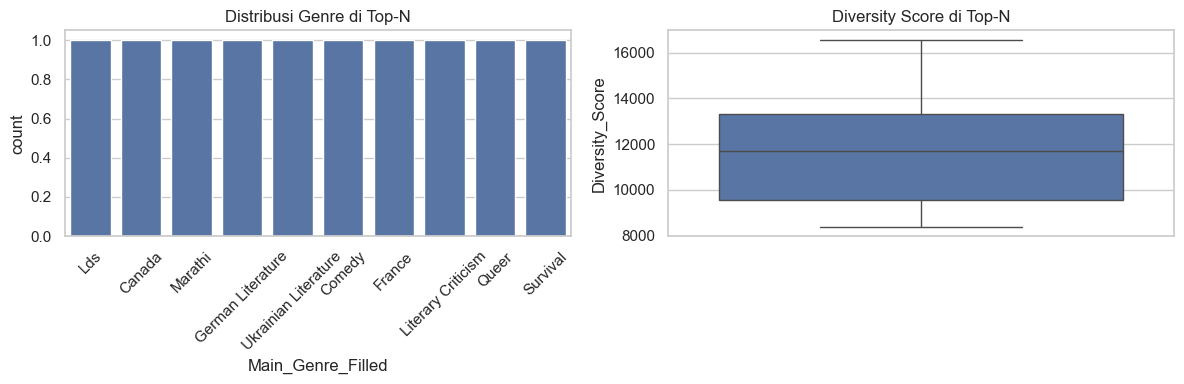

In [51]:
query_index = 0
similarity_row = similarity_matrix[query_index]

# Coba beberapa alpha & evaluasi
results = tune_alpha(query_index, similarity_row, df_clean, alphas=[0.5,1,1.5,2], top_n=10)

# Lihat hasil paling cocok, lalu visualisasi
final_alpha = 1.0  # misalnya
final_scores = similarity_row * (df_clean['Diversity_Score'].values ** final_alpha)
top_idx = np.argsort(final_scores)[::-1]
top_idx = top_idx[top_idx != query_index][:10]
recs = df_clean.iloc[top_idx]

plot_recommendation_stats(recs)